In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
## The dataset
txt_path = "D:\\workspace\\DeepLearning_codes\\AlphaReal\\data.txt"
#df = pd.read_csv(txt_path, sep='\t', lineterminator='\r')
df = pd.read_csv(txt_path, sep='\t')
print(df.head())
df = df.drop(['Unsold','Completed','Starts'], axis=1)
print(df.head())

  Date Time     MM  Price_index Unsold  Permits     JS JS_Ratio  Mort_Int  \
0  2003. 11 -0.449       74.180      -     6663 -1.025     56.9      6.04   
1  2003. 12 -0.451       74.578      -    34008 -0.414     56.6      6.28   
2  2004. 01  0.151       74.910      -     1795  0.208     56.6      6.29   
3  2004. 02  0.302       75.242      -     6977  0.622     56.8      6.15   
4  2004. 03  0.301       76.039      -     2171  0.206     57.2      5.98   

  Completed Starts Reg  
0         -      -  GG  
1         -      -  GG  
2         -      -  GG  
3         -      -  GG  
4         -      -  GG  
  Date Time     MM  Price_index  Permits     JS JS_Ratio  Mort_Int Reg
0  2003. 11 -0.449       74.180     6663 -1.025     56.9      6.04  GG
1  2003. 12 -0.451       74.578    34008 -0.414     56.6      6.28  GG
2  2004. 01  0.151       74.910     1795  0.208     56.6      6.29  GG
3  2004. 02  0.302       75.242     6977  0.622     56.8      6.15  GG
4  2004. 03  0.301       76.039 

In [3]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [4]:
## fisrt 100 rows : training dataset, remaining : validation dataset
TRAIN_SPLIT = 100
tf.random.set_seed(13)

In [5]:
## Forecast a multivariate time series
def build_single_step_train_val_data(df):
    features_considered = ['JS', 'MM', 'Permits']

    features = df[features_considered]
    features.index = df['Date Time']
    features.head()

    #features.plot(subplots=True)

    dataset = features.values
    data_mean = dataset.mean(axis=0)
    data_std = dataset.std(axis=0)

    dataset = (dataset-data_mean)/data_std

    ## Single step model
    past_history = 48
    future_target = 12
    STEP = 2

    x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                    TRAIN_SPLIT, past_history,
                                                    future_target, STEP,
                                                    single_step=True)
    x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                                TRAIN_SPLIT, None, past_history,
                                                future_target, STEP,
                                                single_step=True)
                                            
    return x_train_single, y_train_single, x_val_single, y_val_single

In [6]:
region_df = df.loc[df['Reg'] == 'SO']
region_df.head()

,Date Time,MM,Price_index,Permits,JS,JS_Ratio,Mort_Int,Reg
1536,2003. 11,-0.649,73.943,2137,-0.990,53.6,6.04,SO
1537,2003. 12,-0.327,74.269,17337,-0.400,53.3,6.28,SO
1538,2004. 01,0.656,74.728,1411,0.402,53.2,6.29,SO
1539,2004. 02,0.489,75.055,1218,0.600,53.3,6.15,SO
1540,2004. 03,0.648,75.775,9620,0.000,53.7,5.98,SO


In [7]:
features_considered = ['JS', 'MM', 'Permits']

features = region_df[features_considered]
features.index = region_df['Date Time']
features.head()

,JS,MM,Permits
Date Time,,,
2003. 11,-0.990,-0.649,2137
2003. 12,-0.400,-0.327,17337
2004. 01,0.402,0.656,1411
2004. 02,0.600,0.489,1218
2004. 03,0.000,0.648,9620


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002423EF34148>,
      dtype=object)

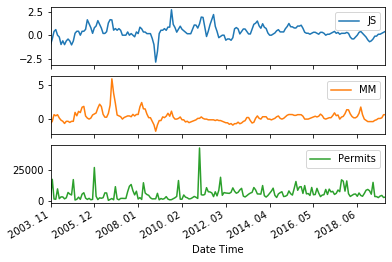

In [8]:
features.plot(subplots=True)

In [9]:
dataset = features.values
dataset

array([[-9.9000e-01, -6.4900e-01,  2.1370e+03],
       [-4.0000e-01, -3.2700e-01,  1.7337e+04],
       [ 4.0200e-01,  6.5600e-01,  1.4110e+03],
       [ 6.0000e-01,  4.8900e-01,  1.2180e+03],
       [ 0.0000e+00,  6.4800e-01,  9.6200e+03],
       [-1.9900e-01,  1.6100e-01,  1.7170e+03],
       [-9.9600e-01, -1.6100e-01,  3.1490e+03],
       [-6.0400e-01, -3.2200e-01,  3.1220e+03],
       [-1.0120e+00, -6.4600e-01,  1.5380e+03],
       [-6.1300e-01, -3.2500e-01,  2.3980e+03],
       [-4.1200e-01, -3.2600e-01,  6.7120e+03],
       [-6.2000e-01, -4.9100e-01,  5.4180e+03],
       [-1.0400e+00, -3.2900e-01,  4.6780e+03],
       [-6.3000e-01, -3.3000e-01,  1.7141e+04],
       [ 2.1100e-01,  9.9300e-01,  6.0100e+02],
       [ 4.2200e-01,  4.9200e-01,  1.2140e+03],
       [ 4.2000e-01,  1.1420e+00,  2.9200e+03],
       [ 0.0000e+00,  9.6800e-01,  1.1400e+03],
       [ 4.1800e-01,  1.7570e+00,  5.3370e+03],
       [ 4.1700e-01,  1.8840e+00,  6.4930e+03],
       [ 6.2200e-01,  4.6200e-01,  2.167

In [10]:
data_mean = dataset.mean(axis=0)
data_std = dataset.std(axis=0)

dataset = (dataset-data_mean)/data_std

In [14]:
x_train_single_li = []
y_train_single_li = []
x_val_single_li = []
y_val_single_li = []
for region in list(df['Reg'].drop_duplicates()):
    region_df = df.loc[df['Reg'] == region]
    x_t, y_t, x_v, y_v = build_single_step_train_val_data(region_df)
    x_train_single_li.append(x_t)
    y_train_single_li.append(y_t)
    x_val_single_li.append(x_v)
    y_val_single_li.append(y_v)
    
x_train_single = np.concatenate(x_train_single_li, axis=0)
y_train_single = np.concatenate(y_train_single_li, axis=0)
x_val_single = np.concatenate(x_val_single_li, axis=0)
y_val_single = np.concatenate(y_val_single_li, axis=0)

print ('Single window of past history')
print (x_train_single.shape)
print (x_train_single[0])
print ('Single window of past history : {}'.format(x_train_single[0].shape))
print ('\n Target temperature to predict')
print (y_train_single.shape)
print (y_train_single[0])
print (x_val_single.shape)
print (y_val_single.shape)

Single window of past history
(832, 24, 3)
[[-1.81587348e+00 -7.59810419e-01 -5.44141199e-01]
 [-1.80063726e-01 -7.33854977e-02 -9.36601686e-01]
 [-1.82717108e-01  9.82207327e-02 -9.06288387e-01]
 [-1.55053532e+00 -7.60954461e-01 -5.65989348e-01]
 [-2.41155764e+00 -9.39424940e-01 -1.41441911e-01]
 [-1.31438436e+00 -7.71250834e-01 -4.96252635e-01]
 [-2.20194050e+00 -9.54297480e-01 -7.77376242e-01]
 [ 7.31372850e-01  4.70034232e-01  1.53629039e-01]
 [ 1.28592960e+00  6.37064296e-01 -6.69586663e-01]
 [ 1.53269409e+00  2.35770277e+00  1.16469046e+00]
 [ 9.34356542e-01  2.53810382e-01 -5.87031293e-01]
 [ 1.43584566e+00 -4.12021792e-01 -6.56364904e-01]
 [-1.90677253e-01 -2.46135770e-01 -9.41116433e-01]
 [ 5.98703771e-01  7.46892283e-01 -1.77398644e-01]
 [ 5.78803409e-01  1.54200115e+00 -7.34405527e-01]
 [-2.01290779e-01  1.31891305e+00 -8.65897527e-01]
 [ 3.06831796e-01  3.68214535e-01 -3.13727872e-01]
 [ 2.28227439e+00  3.52691322e+00 -6.74665753e-01]
 [ 9.75483957e-01  4.48676406e+00 -5.85

In [15]:
## Recurrent neural network
BATCH_SIZE = 96
BUFFER_SIZE = 400

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(16, input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

(96, 1)


In [16]:
EVALUATION_INTERVAL = 200
EPOCHS = 30

single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/30
200/200 [==============================] - 3s 13ms/step - loss: 0.7562 - val_loss: 0.6102
Epoch 2/30
200/200 [==============================] - 1s 6ms/step - loss: 0.6290 - val_loss: 0.6654
Epoch 3/30
200/200 [==============================] - 1s 5ms/step - loss: 0.5818 - val_loss: 0.7026
Epoch 4/30
200/200 [==============================] - 1s 6ms/step - loss: 0.5427 - val_loss: 0.6842
Epoch 5/30
200/200 [==============================] - 1s 6ms/step - loss: 0.5079 - val_loss: 0.6567
Epoch 6/30
200/200 [==============================] - 1s 6ms/step - loss: 0.4821 - val_loss: 0.6814
Epoch 7/30
200/200 [==============================] - 1s 6ms/step - loss: 0.4625 - val_loss: 0.6637
Epoch 8/30
200/200 [==============================] - 1s 6ms/step - loss: 0.4480 - val_loss: 0.6776
Epoch 9/30
200/200 [==============================] - 1s 6ms/step - loss: 0.4373 - val_loss: 0.6973
Epoch 10/30
200/200 [==============================] - 1

In [17]:
def create_time_steps(length):
    time_steps = []
    for i in range(-length, 0, 1):
        time_steps.append(i)
    return time_steps

def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    plt.show()
    return plt
    
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

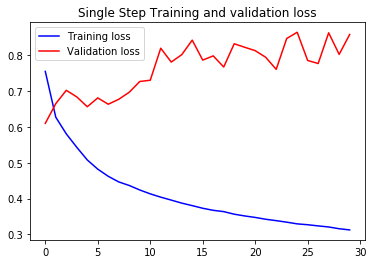

In [18]:
plot_train_history(single_step_history, 'Single Step Training and validation loss')

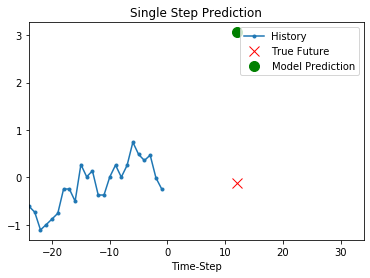

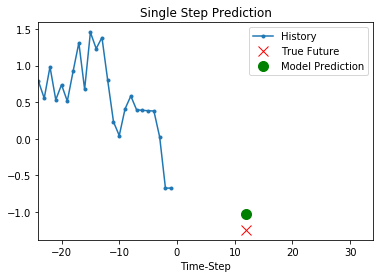

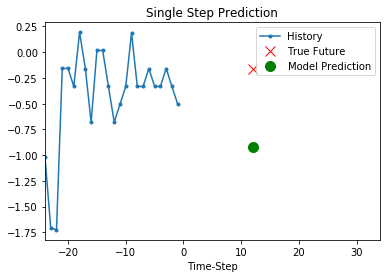

In [19]:
## Predict a single step future
for x, y in val_data_single.take(3):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                        single_step_model.predict(x)[0]], 12,
                    'Single Step Prediction')
    plot.show()